<a href="https://colab.research.google.com/github/tomthomas/FPL-Scrape/blob/main/FPL_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import numpy as np

#### Get URL

In [36]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

#### GET Request

In [3]:
r = requests.get(url)

#### Convert to JSON Object

In [4]:
json = r.json()

#### Look at JSON Keys

In [5]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

#### Focus on 3 keys - elements, element_types, teams

### Create dataframes

In [6]:
elements_df = pd.DataFrame(json['elements'])
element_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])


#### Preview Head

In [7]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0.0,0.0,37605,0,0,-2,2,0,3,0.0,0.0,0,Mesut,0.0,1,False,Not included in Arsenal's 25-man Premier Leagu...,2020-10-20T22:30:18.118477Z,68,37605.jpg,0.0,Özil,0.5,False,None,n,1,3,0,3427,12,53271,257,0.0,0.0,Özil,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,625,248,625,248,625,248,625,248,NaN,,NaN,,NaN,
1,0.0,0.0,39476,0,0,-2,2,0,2,0.0,0.0,0,Sokratis,0.0,2,False,Not included in Arsenal's 25-man Premier Leagu...,2020-10-21T10:30:18.546407Z,48,39476.jpg,0.0,Papastathopoulos,0.1,False,None,n,1,3,0,10261,3,18897,45,0.0,0.0,Sokratis,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,584,215,574,215,566,212,586,215,NaN,,NaN,,NaN,
2,100.0,75.0,41270,0,0,-1,1,0,2,0.8,1.0,0,David,0.3,3,False,,2020-12-26T18:00:15.638627Z,54,41270.jpg,1.1,Luiz Moreira Marinho,0.7,False,None,a,1,3,9,40310,1196,91095,1224,0.1,1.7,David Luiz,479,0,0,0,9,0,0,0,0,0,0,0,70,99.4,25.8,40.0,16.5,263,100,299,94,268,83,302,99,NaN,,4.0,,NaN,
3,100.0,100.0,54694,-1,1,-7,7,1,3,3.2,3.7,3,Pierre-Emerick,2.7,4,False,,2020-12-19T20:30:20.434896Z,113,54694.jpg,3.5,Aubameyang,7.3,False,None,a,1,3,53,515913,7428,3169359,19736,0.2,4.7,Aubameyang,1346,3,1,5,16,1,0,0,2,0,0,4,154,198.8,214.3,433.0,84.6,148,56,62,42,25,14,39,25,NaN,,NaN,,1.0,
4,100.0,100.0,58822,0,0,-4,4,0,2,0.7,1.2,0,Cédric,0.2,5,False,,2020-09-23T09:00:14.881983Z,46,58822.jpg,1.0,Soares,0.2,False,None,a,1,3,1,4135,192,34976,318,0.0,0.2,Cédric,5,0,0,0,0,0,0,0,0,0,0,0,3,0.0,0.0,0.0,0.0,571,211,559,212,547,207,574,212,NaN,,NaN,,NaN,


In [8]:
element_types_df.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],73
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],224
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],248
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],80


In [9]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1190,1210,1170,1210,1190,1200,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1150,1160,1150,1150,1180,1210,2
2,36,0,None,3,0,Brighton,0,0,0,BHA,3,None,False,0,1080,1100,1150,1180,1090,1100,131
3,90,0,None,4,0,Burnley,0,0,0,BUR,2,None,False,0,1050,1080,1120,1190,1010,1030,43
4,8,0,None,5,0,Chelsea,0,0,0,CHE,4,None,False,0,1260,1280,1240,1280,1270,1310,4


#### Preview Columns

In [10]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [11]:
element_types_df.columns

Index(['id', 'plural_name', 'plural_name_short', 'singular_name',
       'singular_name_short', 'squad_select', 'squad_min_play',
       'squad_max_play', 'ui_shirt_specific', 'sub_positions_locked',
       'element_count'],
      dtype='object')

In [12]:
teams_df.columns

Index(['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points',
       'position', 'short_name', 'strength', 'team_division', 'unavailable',
       'win', 'strength_overall_home', 'strength_overall_away',
       'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
       'strength_defence_away', 'pulse_id'],
      dtype='object')

#### Filter smaller dataframe

In [13]:
filter_elements_df = elements_df [['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points', 'form']]

In [14]:
filter_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form
0,Özil,1,3,0.5,68,0,3427,0.0,0,0.0
1,Papastathopoulos,1,2,0.1,48,0,10261,0.0,0,0.0
2,Luiz Moreira Marinho,1,2,0.7,54,479,40310,1.7,9,0.3
3,Aubameyang,1,3,7.3,113,1346,515913,4.7,53,2.7
4,Soares,1,2,0.2,46,5,4135,0.2,1,0.2


## Dataframe Sorting

### Map()

#### Similar to V-lookup

#### Map filter_elements_df to element_type_df (NOT element_type under elements_df)

In [15]:
filter_elements_df['position'] = filter_elements_df.element_type.map(element_types_df.set_index('id').singular_name)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
filter_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,position
0,Özil,1,3,0.5,68,0,3427,0.0,0,0.0,Midfielder
1,Papastathopoulos,1,2,0.1,48,0,10261,0.0,0,0.0,Defender
2,Luiz Moreira Marinho,1,2,0.7,54,479,40310,1.7,9,0.3,Defender
3,Aubameyang,1,3,7.3,113,1346,515913,4.7,53,2.7,Midfielder
4,Soares,1,2,0.2,46,5,4135,0.2,1,0.2,Defender


#### We^ organized Name by position i think

In [17]:
filter_elements_df['team'] = filter_elements_df.team.map(teams_df.set_index('id').name)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Adding Team name

In [18]:
filter_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,position
0,Özil,Arsenal,3,0.5,68,0,3427,0.0,0,0.0,Midfielder
1,Papastathopoulos,Arsenal,2,0.1,48,0,10261,0.0,0,0.0,Defender
2,Luiz Moreira Marinho,Arsenal,2,0.7,54,479,40310,1.7,9,0.3,Defender
3,Aubameyang,Arsenal,3,7.3,113,1346,515913,4.7,53,2.7,Midfielder
4,Soares,Arsenal,2,0.2,46,5,4135,0.2,1,0.2,Defender


#### Sort by value_season

#### Helps us see the top value picks of the year

#### value_season has string values

#### To avoid data conflict, we need to create a new column called value. 
#### astype() helps convert values to float

In [19]:
filter_elements_df['value'] = filter_elements_df.value_season.astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


sort_values() helps you sort data

#### Default is ascending direction from low to high. For descending, set to False.

In [20]:
filter_elements_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,position,value
33,Martínez,Aston Villa,1,29.3,51,1350,2579045,16.3,83,6.0,Goalkeeper,16.3
485,Bednarek,Southampton,2,11.4,49,1440,1067785,16.1,79,6.3,Defender,16.1
286,Bamford,Leeds,4,42.1,66,1456,4710129,15.3,101,5.2,Forward,15.3
297,Meslier,Leeds,1,5.8,46,1530,625763,15.2,70,4.2,Goalkeeper,15.2
473,McCarthy,Southampton,1,18.6,47,1440,1108754,15.1,71,4.5,Goalkeeper,15.1
284,Dallas,Leeds,2,12.9,48,1520,1319975,14.8,71,6.2,Defender,14.8
582,Soucek,West Ham,3,11.2,52,1530,1193514,14.8,77,5.6,Midfielder,14.8
484,Walker-Peters,Southampton,2,12.7,48,1530,1029277,14.4,69,4.8,Defender,14.4
569,Cresswell,West Ham,2,12.3,54,1530,1428666,14.3,77,4.8,Defender,14.3
565,Fabianski,West Ham,1,3.6,51,1440,402705,13.9,71,2.6,Goalkeeper,13.9


#### Value season = total points / now cost

### Using Pivot_table()

#### Using pivot on column position -> value by position

In [21]:
pivot = filter_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [22]:
pivot.sort_values('value',ascending = False)

,position,value
0,Defender,3.984375
3,Midfielder,3.942339
1,Forward,3.821250
2,Goalkeeper,3.309589


#### This result maybe skewed by players who play less minutes

#### Let's remove 0 minute players

### Using .loc[ ]

#### .loc helps you locate specifc rows/columns

In [23]:
filter_elements_df = filter_elements_df.loc[filter_elements_df.value > 0 ]

In [24]:
pivot = filter_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [25]:
pivot.sort_values('value',ascending = False)

,position,value
2,Goalkeeper,7.793548
0,Defender,5.344311
3,Midfielder,5.065803
1,Forward,4.930645


#### Which Teams are providing the most value this year?

In [26]:
team_pivot = filter_elements_df.pivot_table(index = 'team', values = 
                                        'value', aggfunc = np.mean).reset_index()

In [27]:
team_pivot.sort_values('value', ascending = False)

,team,value
8,Leeds,7.794737
1,Aston Villa,7.636842
15,Southampton,7.036364
18,West Ham,6.631818
19,Wolves,5.814286
5,Crystal Palace,5.619048
16,Spurs,5.595455
3,Burnley,5.540000
4,Chelsea,5.512500
2,Brighton,5.173913


####

### Using .hist()

#### Histogram distribution of each value by position

#### Filter more dataframes

In [28]:
fwd_df = filter_elements_df.loc[filter_elements_df.position == 'Forward']
mid_df = filter_elements_df.loc[filter_elements_df.position == 'Midfielder']
def_df = filter_elements_df.loc[filter_elements_df.position == 'Defender']
gk_df = filter_elements_df.loc[filter_elements_df.position == 'Goalkeeper']

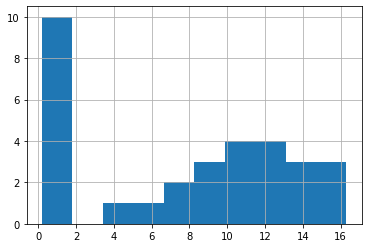

In [29]:
gk_df.value.hist()

In [30]:
gk_df.sort_values('value', ascending = False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,position,value
33,Martínez,Aston Villa,1,29.3,51,1350,2579045,16.3,83,6.0,Goalkeeper,16.3
297,Meslier,Leeds,1,5.8,46,1530,625763,15.2,70,4.2,Goalkeeper,15.2
473,McCarthy,Southampton,1,18.6,47,1440,1108754,15.1,71,4.5,Goalkeeper,15.1
565,Fabianski,West Ham,1,3.6,51,1440,402705,13.9,71,2.6,Goalkeeper,13.9
112,Pope,Burnley,1,10.3,54,1260,365461,13.9,75,6.6,Goalkeeper,13.9
7,Leno,Arsenal,1,10.0,49,1530,608209,13.7,67,4.3,Goalkeeper,13.7
500,Lloris,Spurs,1,7.8,56,1440,503380,13.0,73,4.0,Goalkeeper,13.0
414,Darlow,Newcastle,1,4.8,50,1440,265662,12.2,61,2.8,Goalkeeper,12.2
543,Johnstone,West Brom,1,2.1,45,1530,257394,12.0,54,2.2,Goalkeeper,12.0
249,Schmeichel,Leicester,1,9.5,55,1530,374706,11.5,63,3.5,Goalkeeper,11.5


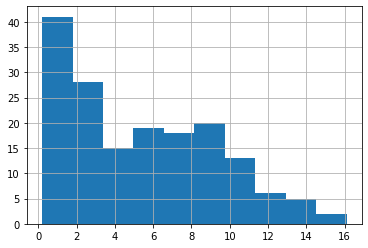

In [31]:
def_df.value.hist()

In [32]:
def_df.sort_values('value',ascending = False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,position,value
485,Bednarek,Southampton,2,11.4,49,1440,1067785,16.1,79,6.3,Defender,16.1
284,Dallas,Leeds,2,12.9,48,1520,1319975,14.8,71,6.2,Defender,14.8
484,Walker-Peters,Southampton,2,12.7,48,1530,1029277,14.4,69,4.8,Defender,14.4
569,Cresswell,West Ham,2,12.3,54,1530,1428666,14.3,77,4.8,Defender,14.3
134,Zouma,Chelsea,2,20.4,58,1350,2356501,13.4,78,1.8,Defender,13.4
566,Ogbonna,West Ham,2,2.3,50,1502,248667,13.2,66,3.4,Defender,13.2
479,Vestergaard,Southampton,2,4.7,48,1125,1395649,13.1,63,1.8,Defender,13.1
48,Targett,Aston Villa,2,4.8,46,1350,533502,12.2,56,4.2,Defender,12.2
270,Justin,Leicester,2,21.5,50,1530,2132810,12.2,61,4.0,Defender,12.2
596,Saïss,Wolves,2,11.8,51,1057,2049646,12.2,62,4.4,Defender,12.2


In [33]:
mid_df.sort_values('value',ascending = False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,position,value
582,Soucek,West Ham,3,11.2,52,1530,1193514,14.8,77,5.6,Midfielder,14.8
507,Son,Spurs,3,63.6,98,1346,5759215,13.5,132,6.4,Midfielder,13.5
608,Lomba Neto,Wolves,3,16.5,60,1351,1649715,13.3,80,5.0,Midfielder,13.3
480,Ward-Prowse,Southampton,3,12.2,62,1530,1908397,12.7,79,3.0,Midfielder,12.7
43,Grealish,Aston Villa,3,37.1,77,1350,4265668,12.6,97,4.8,Midfielder,12.6
287,Harrison,Leeds,3,2.4,54,1309,465559,12.4,67,5.4,Midfielder,12.4
171,Zaha,Crystal Palace,3,20.7,74,1340,3671996,12.0,89,2.8,Midfielder,12.0
282,Klich,Leeds,3,4.8,55,1401,1045146,12.0,66,2.8,Midfielder,12.0
386,Borges Fernandes,Man Utd,3,53.7,113,1299,4235511,11.5,130,8.3,Midfielder,11.5
74,March,Brighton,3,1.4,50,1312,267571,11.2,56,2.8,Midfielder,11.2


### Export to Excel

In [34]:
filter_elements_df.to_csv('~/Desktop/fpl_data.csv')

FileNotFoundError: ignored

### Download Player History

#### View entire DataFrame

In [ ]:
pd.options.display.max_columns = None

r

### JSON object holds all data together

In [ ]:
json

### Build and Test for a loop

In [ ]:
url = f'https://fantasy.premierleague.com/api/element-summary/{element_id}/'

In [ ]:
for x in elements_df.index[:10] :
    element_id = elements_df.id[x]  #loop thru first 5 elements
    element_name = elements_df.first_name[x] 
    print(x)
    print(element_id)
    print(element_name)

In [ ]:
elements_df.first_name[0]

### F-String Formatting

#### Without

In [ ]:
your_name = "David"
print("Hi, my name is {your_name}")

### With 

In [ ]:
print(f"Hi, my name is {your_name}")